### Image Segmentation
DESCRIPTION

There is an image named “tiger.png.” Use k-means clustering with k set to 16 and cluster the image, which means that you want to keep just 16 colors in your compressed image.


### Objective: 
Open and display the image “tiger.png.” Convert the image into numpy array, so that it can be used in further processing. Find out the dimensions of the image and convert it into a two- dimensional array (Use k-means clustering for image segmentation, reducing the image to 16 color

##### Step 1: Import Libraries

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

##### Step 2: Get the Image and its Corresponding RGB Value

In [4]:
img = Image.open('C:/data/tiger.png')
img_np=np.asarray(img)
img_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

##### Step 3: Get the Image Dimensions


In [5]:
img_np.shape

(720, 1280, 3)

 ###### For feeding this data into the algorithm, you must change the shape of this data into a dataset with 720*1280 =921600 rows and 3 columns

###### Step 4: Reshape the Data

In [6]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

###### Step 5: Define the K-means Model

In [7]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

 After the model is trained, model.labels_ is used to obtain the number of cluster that is assigned to
each data point or each pixel.
model.cluster_centers_ gives us the coordinates or the RGB values of the 16 cluster centers.

###### Step 6: Define the Cluster Centres 

In [8]:
pixel_centroids = model.labels_
cluster_centers=model.cluster_centers_
pixel_centroids

array([ 1,  1,  1, ..., 15, 15, 15])

In [9]:
cluster_centers

array([[134.60227175, 108.36826743,  82.69036664],
       [152.37456413, 155.04769525, 153.11570337],
       [ 50.17287785,  40.63040192,  35.2708929 ],
       [203.20318107, 200.71040636, 199.21919956],
       [ 91.91007921,  88.89324991,  79.84401332],
       [128.65714519, 133.43767019, 120.46894401],
       [ 68.05862571,  66.69622459,  56.3538782 ],
       [188.04924134,  85.29315774, 131.62109934],
       [175.52243527, 176.18052108, 176.45256098],
       [ 61.17154539, 126.54385833,  44.08721499],
       [211.03403493, 168.98602137, 133.68415329],
       [ 24.16508774,  18.59462805,  16.37042021],
       [174.41848591, 136.23886313, 101.68454645],
       [105.58020311,  69.11240519,  43.02398766],
       [230.65268685, 229.58248525, 229.78796915],
       [106.16314724, 113.99590203, 101.12815784]])

###### Step 7: Cluster Assignment

In [12]:
final=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(16):
    final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[152.37456413, 155.04769525, 153.11570337],
       [152.37456413, 155.04769525, 153.11570337],
       [152.37456413, 155.04769525, 153.11570337],
       [152.37456413, 155.04769525, 153.11570337],
       [152.37456413, 155.04769525, 153.11570337]])

###### Step 8: Reshape to Original Dimensions


In [13]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

##### Step 9: Convert the Pixel Values to Image

In [16]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save('C:/data/tiger_compressed.png')
img_1 = mpimg.imread('C:/data/tiger.png')
img_2 = mpimg.imread('tiger_compressed.png')

##### Step 10: Original Plot vs. Compressed Image


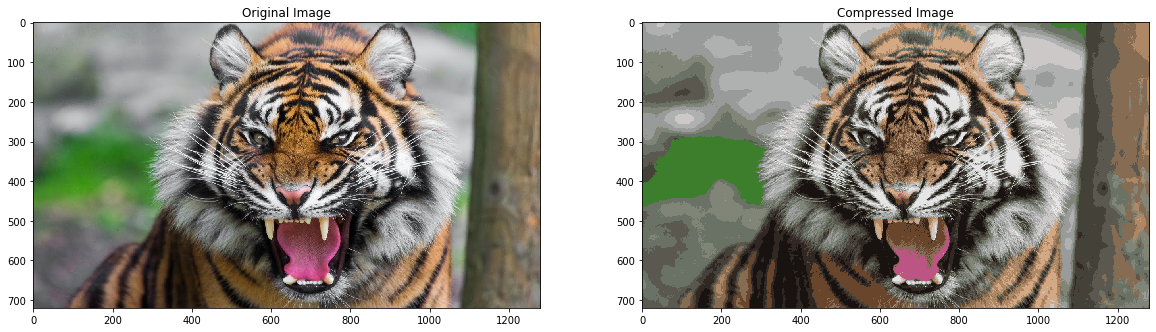

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()